# Gráfica de Datos de Manchas Solares usando Google Colab

Por ejemplo datos de manchas solares tomados de https://www.sidc.be/SILSO/home

In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

# Listar los archivos subidos

In [1]:
!ls

Manchas-Solares.ipynb  README.md  SN_m_tot_V2.0.txt  WavelengthColors.png


In [2]:
! more SN_m_tot_V2.0.txt

1749 01 1749.042   96.7  -1.0    -1  
1749 02 1749.123  104.3  -1.0    -1  
1749 03 1749.204  116.7  -1.0    -1  
1749 04 1749.288   92.8  -1.0    -1  
1749 05 1749.371  141.7  -1.0    -1  
1749 06 1749.455  139.2  -1.0    -1  
1749 07 1749.538  158.0  -1.0    -1  
1749 08 1749.623  110.5  -1.0    -1  
1749 09 1749.707  126.5  -1.0    -1  
1749 10 1749.790  125.8  -1.0    -1  
1749 11 1749.874  264.3  -1.0    -1  
1749 12 1749.958  142.0  -1.0    -1  
1750 01 1750.042  122.2  -1.0    -1  
1750 02 1750.123  126.5  -1.0    -1  
1750 03 1750.204  148.7  -1.0    -1  
1750 04 1750.288  147.2  -1.0    -1  
1750 05 1750.371  150.0  -1.0    -1  
1750 06 1750.455  166.7  -1.0    -1  
1750 07 1750.538  142.3  -1.0    -1  
1750 08 1750.623  171.7  -1.0    -1  
1750 09 1750.707  152.0  -1.0    -1  
1750 10 1750.790  109.5  -1.0    -1  
1750 11 1750.874  105.5  -1.0    -1  
m--More--(0%)

# Otra opción es poner los archivos de datos en google drive y montar google drive en google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls ./drive/MyDrive

# Imprimir el inicio o final de alguno de los archivos

In [3]:
import pandas as pd
df = pd.read_fwf("ms2048.txt",header=None,)
df.head(10)


,0,1,2,3,4,5
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1
5,1749,6,1749.455,139.2,-1.0,-1
6,1749,7,1749.538,158.0,-1.0,-1
7,1749,8,1749.623,110.5,-1.0,-1
8,1749,9,1749.707,126.5,-1.0,-1
9,1749,10,1749.790,125.8,-1.0,-1


# Graficamos usando Matplotlib

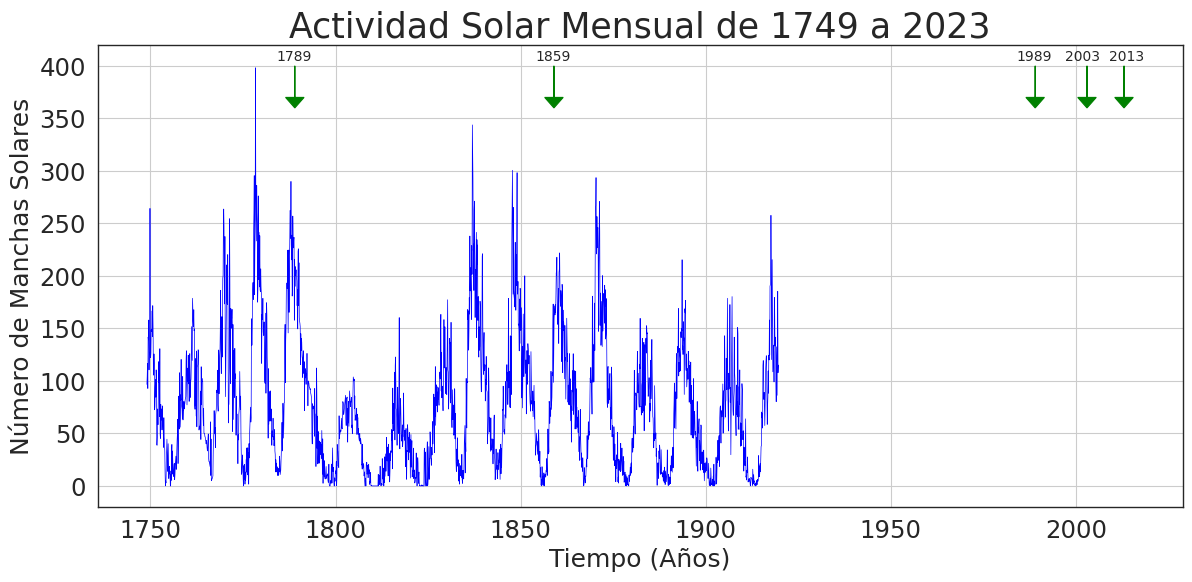

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df.iloc[:, 2],df.iloc[:, 3],'-b',linewidth=.5)
plt.xlabel("Tiempo (Años)", fontsize=18)
plt.ylabel("Número de Manchas Solares", fontsize=18)
plt.title("Actividad Solar Mensual de 1749 a 2023", fontsize=25)
plt.grid()
plt.arrow(1789, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1789', xy = (1789-5, 400+5), fontsize=10)
plt.arrow(1859, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1859', xy = (1859-5, 400+5), fontsize=10)
plt.arrow(1989, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1989', xy = (1989-5, 400+5), fontsize=10)
plt.arrow(2003, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('2003', xy = (2003-6, 400+5), fontsize=10)
plt.arrow(2013, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('2013', xy = (2013-4, 400+5), fontsize=10)
plt.show()

# Lo mismo pero usando Seaborn

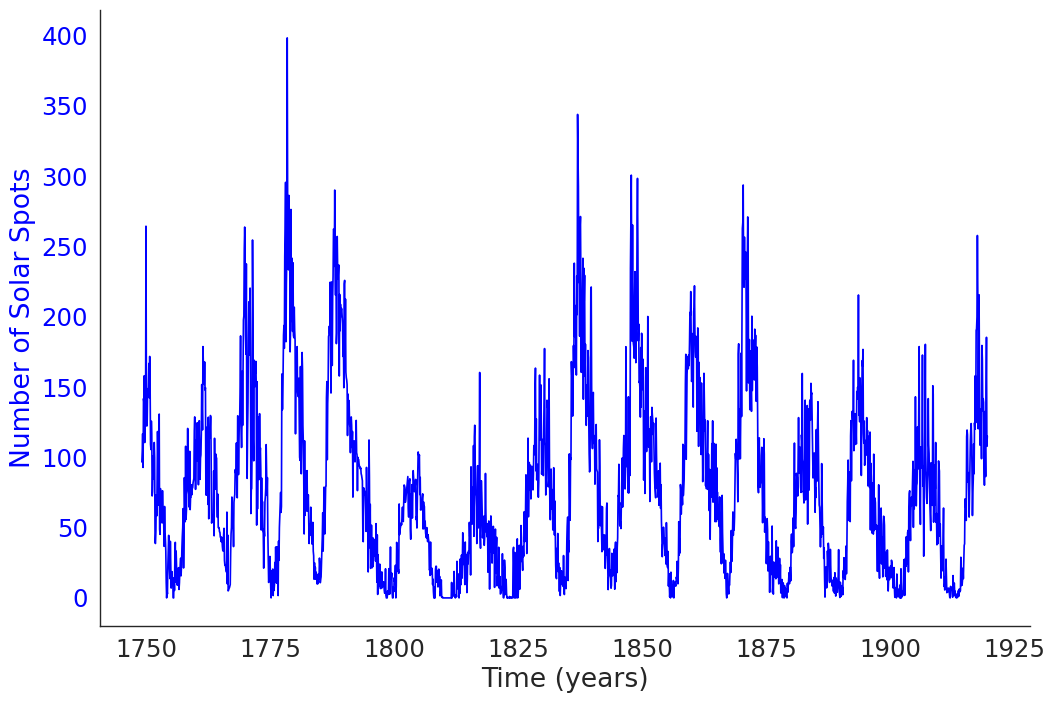

In [11]:
import numpy as np               # Array manipulation
import pandas as pd              # Data Manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns
# Define a function called timeseries_plot
def timeseries_plot(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x, y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)         # Statistical plotting
# Define style
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

# setting figure and axis objects
fig, ax = plt.subplots(figsize = (12, 8))

# Plotting sales values
timeseries_plot(ax, df.iloc[:, 2],df.iloc[:, 3], "blue", "Time (years)", "Number of Solar Spots")

sns.despine(right = True)
plt.show()

# Lo mismo pero usando Plotly

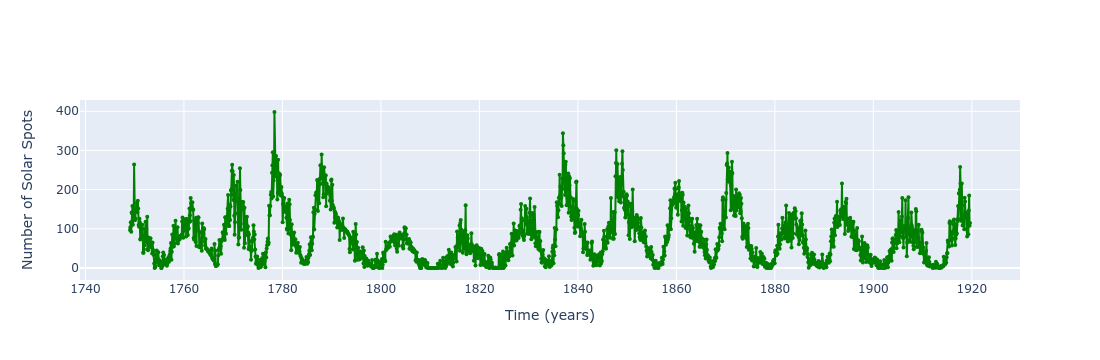

In [4]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np

fig = go.Figure(data=go.Scatter(x=df.iloc[:, 2], y=df.iloc[:, 3], mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Time (years)",yaxis_title="Number of Solar Spots")
#fig.show(renderer="colab")
fig.show()

# Hacemos el análisis de Fourier

In [13]:
F = abs(np.fft.fft(df.iloc[:, 3]))
print(np.size(df.iloc[:, 3]),np.size(F))
Xf = [i for i in range(np.size(F))]


2048 2048


In [5]:
import plotly

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
 
init_notebook_mode(connected=True)
import numpy as np

fig = go.Figure(data=go.Scatter(x=Xf, y=F, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Frecuencia (1/3303 1/mes)",yaxis_title="abs(FFT)")
fig.show()

NameError: name 'Xf' is not defined

# El pico está en 25 que convertido a frecuencia es 25/3303 1/mes con un periodo de 3303/25 meses = 11.01 años

# Distribución de Plank para el cuerpo negro

### Intensity vs Wavelength (Energy in Joules emitted per second per unit wavelength per steradian from one square meter of a blackbody at temperature T)

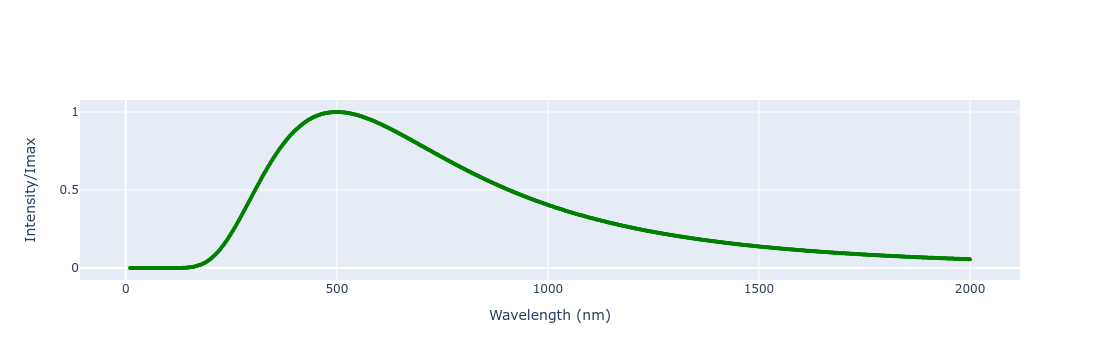

I max =  26882237930093.656


In [6]:
import math
import scipy

lambdas = np.linspace(10, 2000, 1000).tolist()
Temp = 5800

h = scipy.constants.h
c = scipy.constants.c
k = scipy.constants.k
lamdda_peak = (2.897771955/10**3)/Temp*10**9
I_peak =(2*h*c**2/(lamdda_peak/10**9)**5) / (math.exp(h*c/(lamdda_peak/10**9)/k/Temp)-1)
I = []
scala = 1
for long_onda in lambdas:
    try:
        s =(2*h*c**2/(long_onda/10**9)**5) / (math.exp(h*c/(long_onda/10**9)/k/Temp)-1)/I_peak
        I.append(s)
    except OverflowError:
        I.append(0)
fig = go.Figure(data=go.Scatter(x=lambdas, y=I, mode='lines+markers',marker=dict(color='green',symbol='circle', size=4,)))
fig.update_layout(xaxis_title="Wavelength (nm)",yaxis_title="Intensity/Imax")
fig.show()
print("I max = ",I_peak)

# Agregamos los colores correspondientes en el visible

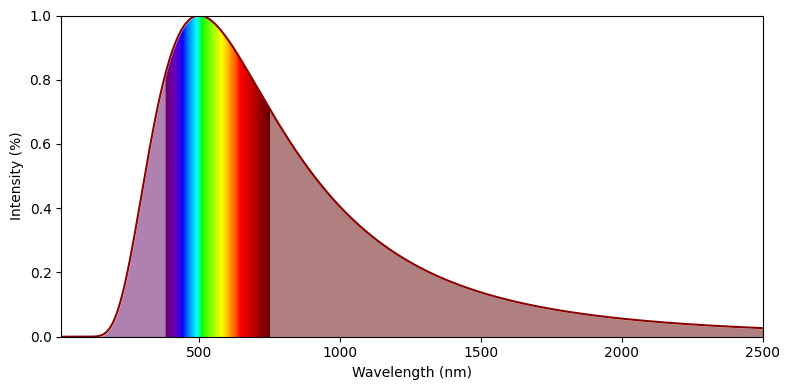

I max =  26882237930093.656


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
lambdas = np.linspace(10, 2500, 1000).tolist()
Temp = 5800 # K

h = scipy.constants.h
c = scipy.constants.c
k = scipy.constants.k
lamdda_peak = (2.897771955/10**3)/Temp*10**9
I_peak =(2*h*c**2/(lamdda_peak/10**9)**5) / (math.exp(h*c/(lamdda_peak/10**9)/k/Temp)-1)
I = []
scala = 1
for long_onda in lambdas:
    try:
        s =(2*h*c**2/(long_onda/10**9)**5) / (math.exp(h*c/(long_onda/10**9)/k/Temp)-1)/I_peak
        I.append(s)
    except OverflowError:
        I.append(0)
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

spectrum = np.array(I)
plt.plot(lambdas, spectrum, color='darkred')

y = np.linspace(0, 1, 100)
X,Y = np.meshgrid(lambdas, y)

extent=(np.min(lambdas), np.max(lambdas), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (%)' )

plt.fill_between(lambdas, spectrum, 1, color='w')
plt.savefig('WavelengthColors.png', dpi=200)

plt.show()
print("I max = ",I_peak)

# Medición del número de manchas solares en una fotografía del Sol
## Hacer un programa para medir el número de manchas y la distibución de tamaños en la fotografía siguiente:

https://protonsforbreakfast.files.wordpress.com/2015/10/sunspots-in-2001.gif

## Tomada de https://protonsforbreakfast.wordpress.com/2015/10/12/counting-sunspots-how-hard-can-it-be/

In [22]:
from IPython.display import Image

Image(url="https://protonsforbreakfast.files.wordpress.com/2015/10/sunspots-in-2001.gif")

